# TP3 

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import scipy.signal
import scipy.io.wavfile
import sounddevice
from matplotlib.colors import LogNorm


#### 1 Short Time Fourier Transform

##### 1.1 Signal interpretation

`seq.wav`

In [2]:
#1-
signal = 'seq.wav'
fs, x= sp.io.wavfile.read(signal)


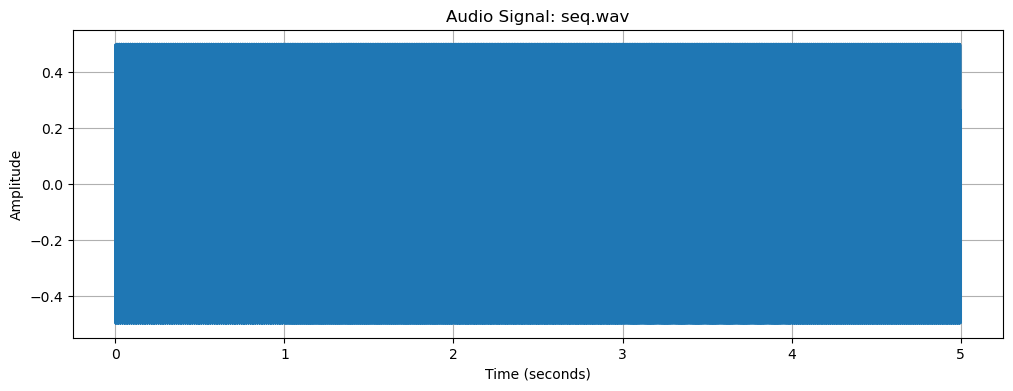

In [3]:
#2- plotting in the time domain
def plot_signal(fs,x):
    time = np.arange(len(x))/fs
    pl.figure(figsize=(12, 4))
    pl.plot(time, x)
    pl.title(f'Audio Signal: {signal}')
    pl.xlabel('Time (seconds)')
    pl.ylabel('Amplitude')
    pl.grid()
    pl.show()


plot_signal(fs,x)

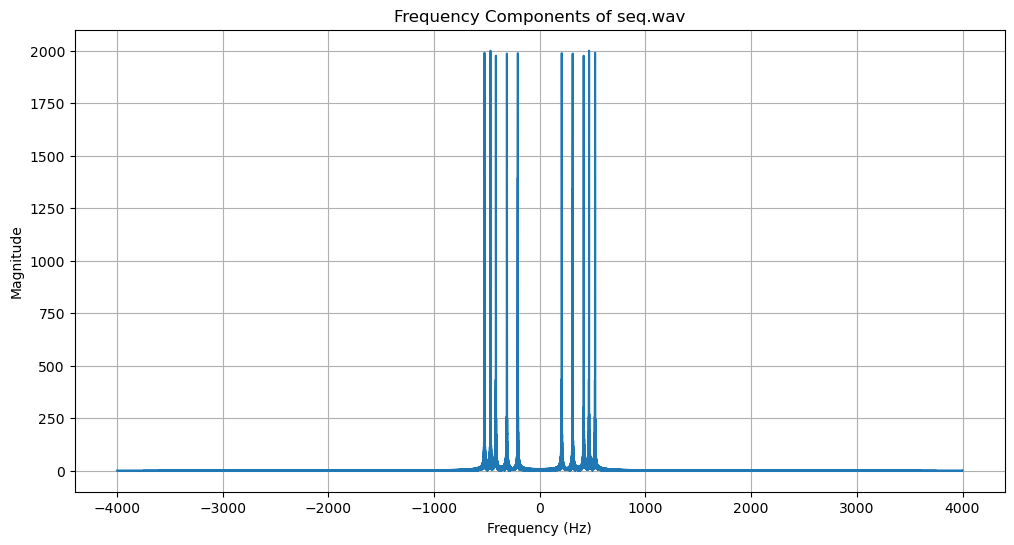

In [4]:
#plotting in the fourier domain
def plot_fft(fs,x):
    X = np.fft.fft(x)
    f = np.fft.fftfreq(len(x), 1/fs)
    X_shifted = np.fft.fftshift(X)
    f_shifted = np.fft.fftshift(f)
    pl.figure(figsize=(12, 6))
    pl.plot(f_shifted, np.abs(X_shifted))
    pl.title(f'Frequency Components of {signal}')
    pl.xlabel('Frequency (Hz)')
    pl.ylabel('Magnitude')
    pl.grid()
    pl.show()

plot_fft(fs,x)

In [5]:
#3- computing STFT
f, t, STFT = sp.signal.stft(x, fs, nperseg=2048, noverlap=(2048/2), window= 'rectangular')


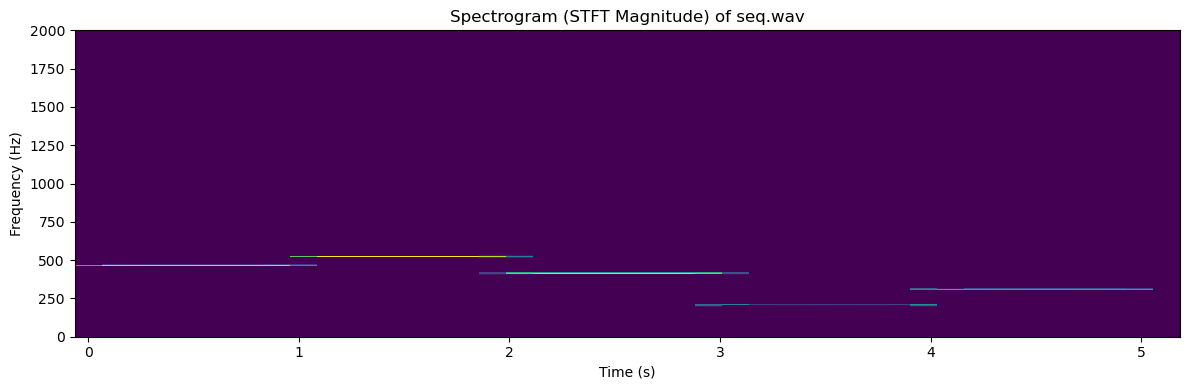

In [6]:
#4- visualizing the spectrogram

spectrogram = np.abs(STFT)**2
pl.figure(figsize=(12, 4))
pl.pcolormesh(t, f, spectrogram, norm=LogNorm(vmin=1e-3, vmax=np.max(np.abs(spectrogram))))
pl.title(f'Spectrogram (STFT Magnitude) of {signal}')
pl.ylabel('Frequency (Hz)')
pl.xlabel('Time (s)')
pl.ylim(0,2000)
pl.tight_layout()
pl.show()
    

The signal contains 5 fequencies ranging between 250 and 550 as we can see in the FFT plot. These frequencies can also be seen  as horizontal bands in the spectrogram. Each second of the audio corresponds to a different frequency value because the signal is built by concatenating different MIDI notes (TP1), the signal is slow varying and steady. The frequencies are steady and stationary over time, with no significant variation within each segment.

Since the signal is slow varying (with the same frequency over every second), we don't need high time resolution so it is better to increase nperseg to increase frequency resolution and better resolve the precise frequency values at each timestep. I fixed `nperseg=2048` with a rectangular window because all frequencies have almost the same magnitude.

Although norm=LogNorm is usually better for interpretability, since the frequency magnitudes are relatively uniform, even a `norm=None` allows effective visualization since it preserves raw amplitude values.  A default Hann window suffices for minimizing spectral leakage.

There is no visible noise in the spectrogram. The signal is pure because it is synthetic with sharply defined frequency values.

We can extract the five frequencies and therefore the five MIDI notes  [70, 72, 68, 56, 63]   that were concatenated to construct the `seq.wav` signal through the spectrogram.

`drum.wav`

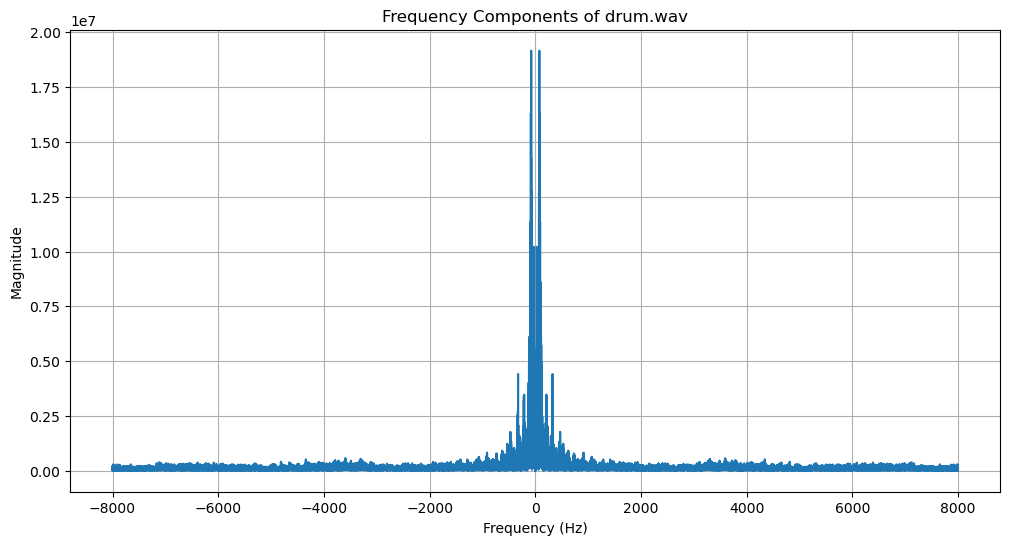

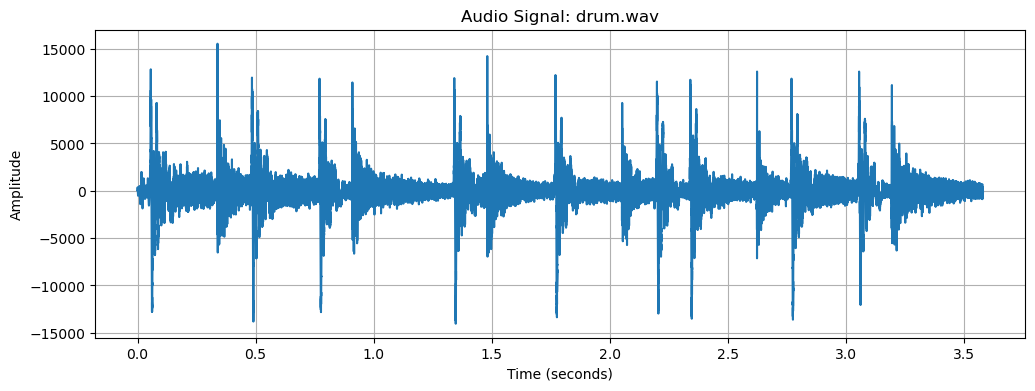

In [7]:
signal = 'drum.wav'
fs, x= sp.io.wavfile.read(signal)
plot_fft(fs,x)
plot_signal(fs,x)


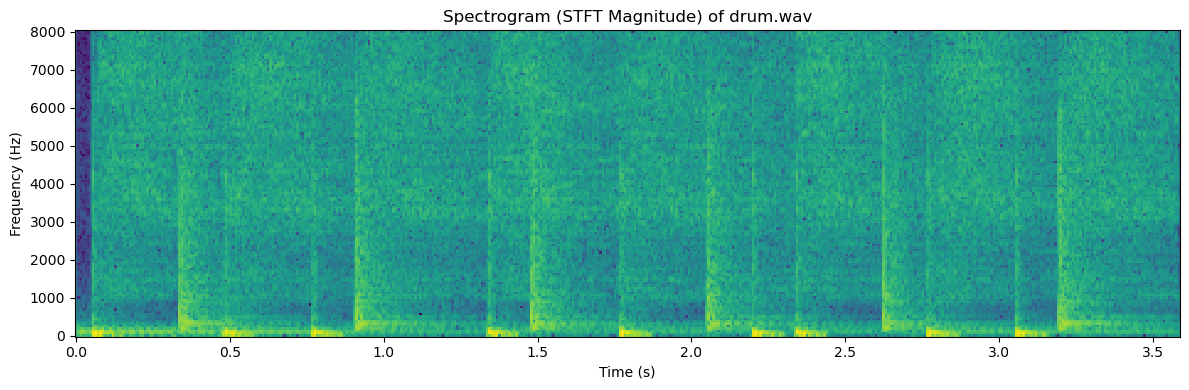

In [8]:
f, t, STFT = sp.signal.stft(x, fs, nperseg=256, noverlap=(256/2), window= 'hann')
spectrogram = np.abs(STFT)**2
pl.figure(figsize=(12, 4))
pl.pcolormesh(t, f, spectrogram, norm=LogNorm(vmin=1e-3, vmax=np.max(np.abs(spectrogram))))
pl.title(f'Spectrogram (STFT Magnitude) of {signal}')
pl.ylabel('Frequency (Hz)')
pl.xlabel('Time (s)')
pl.tight_layout()
pl.show()

The signal exhibits a rich range of frequencies. Upon comparing the temporal signal with the spectrogram, we can see the drum hits visible as distinct bright impulses in the spectrogram. They are localized in time and spread across the lower frequency range which gives a dirac appearance in the spectrogram. The yellow dashes are the fundamental low notes of the drums.

Norm=None  leads to a poor visualization for signals with large dynamic ranges and gives a blank spectrogram. It is better to use the log scaling because it compresses the range of frequencies, enhancing the visibility of both large and small ones in the spectrogram. Same for nperseg, as we need good time resolution, a smaller window size is needed. 256 samples is good to achieve a balance between time and frequency resolution. For this reason too a hann window is the best compromise.


Cymbal contributes to higher frequency content that is relatively scattered across time, creating a uniform noise in the spectrogram. So we can distinguish the two distict sources: Drums in the low frequencies, Cymbal as noise in the high frequencies.

We can recover the fundamental frequency of the signal as the bright yellow bands at the bottom of the spectrogram, representing the lowest frequency component. The period can be inferred from the time interval between consecutive hits.

`stairway.wav`, `stairwayb.wav`

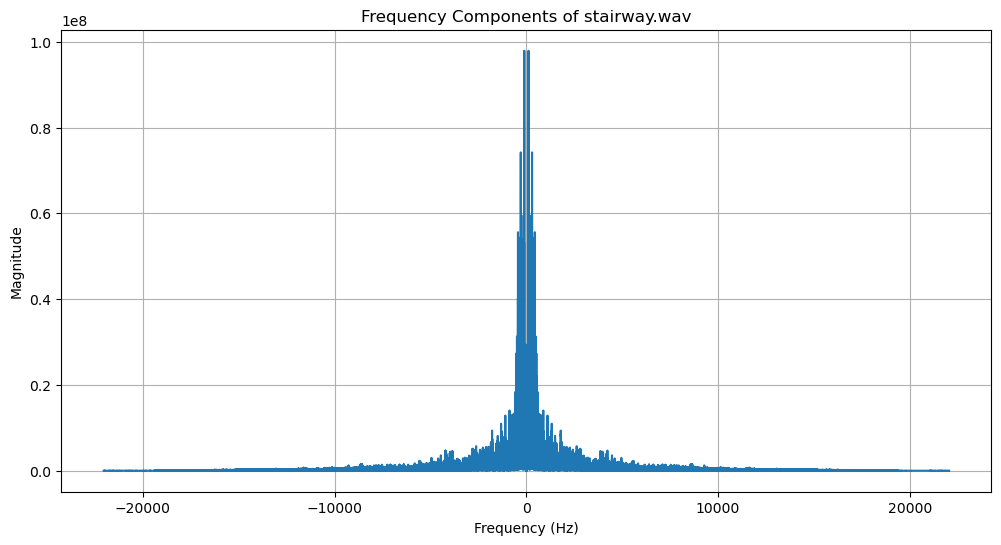

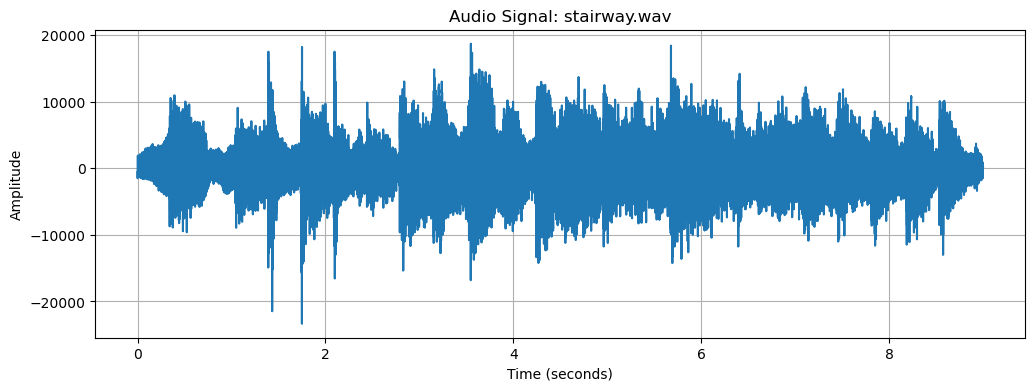

In [9]:
signal = 'stairway.wav'
fs, x= sp.io.wavfile.read(signal)
plot_fft(fs,x)
plot_signal(fs,x)


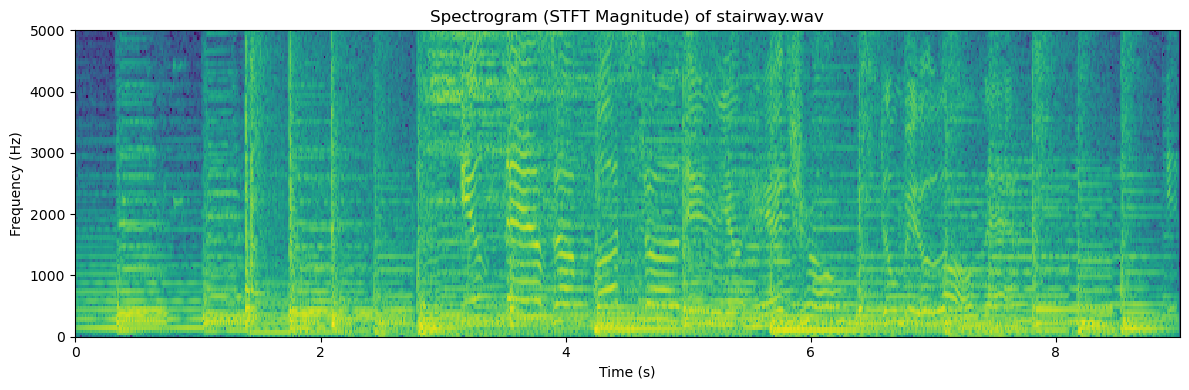

In [10]:
f, t, STFT = sp.signal.stft(x, fs, nperseg=1024, noverlap=(1024/2), window= 'hann')
spectrogram = np.abs(STFT)**2
pl.figure(figsize=(12, 4))
pl.pcolormesh(t, f, spectrogram, norm=LogNorm(vmin=1e-3, vmax=np.max(np.abs(spectrogram))))
pl.title(f'Spectrogram (STFT Magnitude) of {signal}')
pl.ylabel('Frequency (Hz)')
pl.xlabel('Time (s)')
pl.ylim(0,5000)
pl.tight_layout()
pl.show()

The vertical lines are diracs generated by the drum beats, they are very localised in time and spread across the frequency spectrum. In the beginning of the signal, there are parallel horizontal lines with high magnitude, those are the harmonics of the same note played on the guitar. Later, parallel squiggling patterns appear in the spectrogram corresponding to the singing voice. They reflect the fundamental frequency changing over time due the natural vibrato and pitch modulation in voice.

Here we need a compromise between a good time resolution and a good frequency resolution so a value of nperseg =1024 gives a good vizualization. LogNorm scaling is essential because the signal contains frequencies with highly varying amplitudes.

There are three main components that can be detected through the spectrogram as we explained previously (drums, guitar, voice). The signal appears clean, with no significant noise aside from the background noise, which is uniform and minimal.

The guitar's fundamental frequency can be extracted, along with its harmonics. The period of the drums can be deduced from the time intervals between consecutive vertical lines.

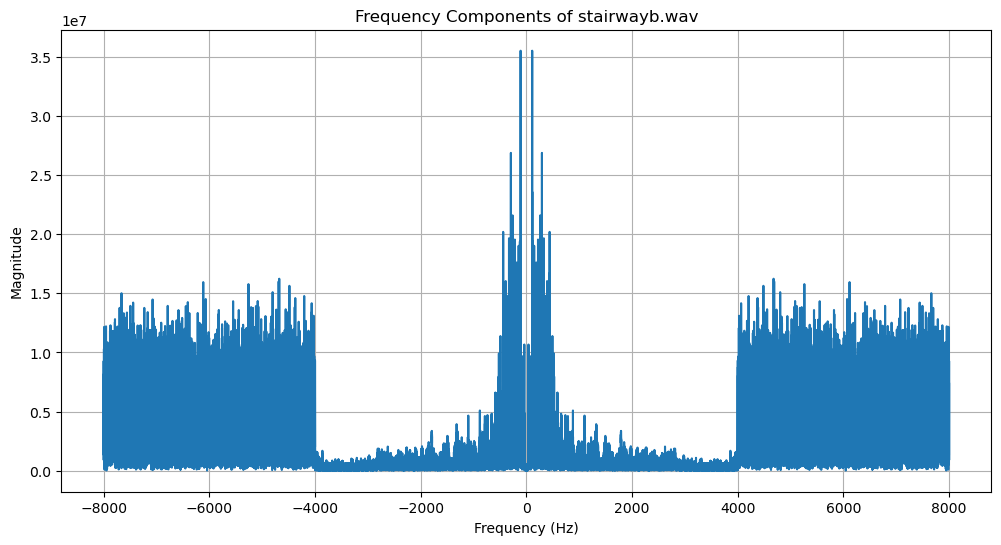

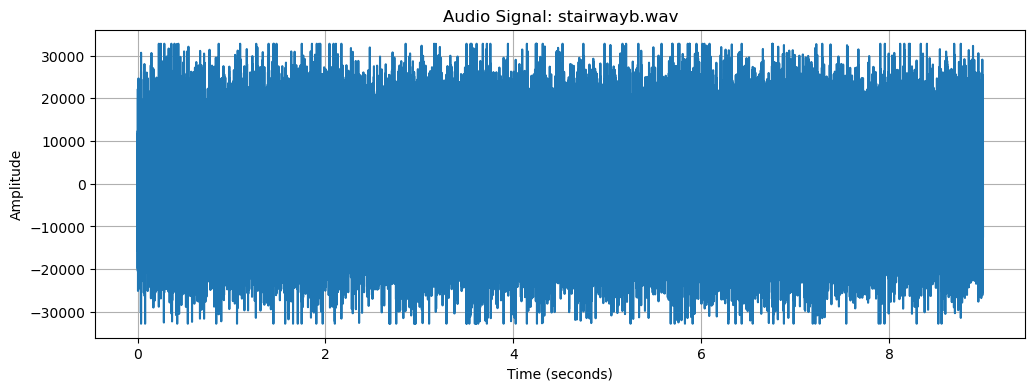

In [11]:
signal = 'stairwayb.wav'
fs, x= sp.io.wavfile.read(signal)
plot_fft(fs,x)
plot_signal(fs,x)


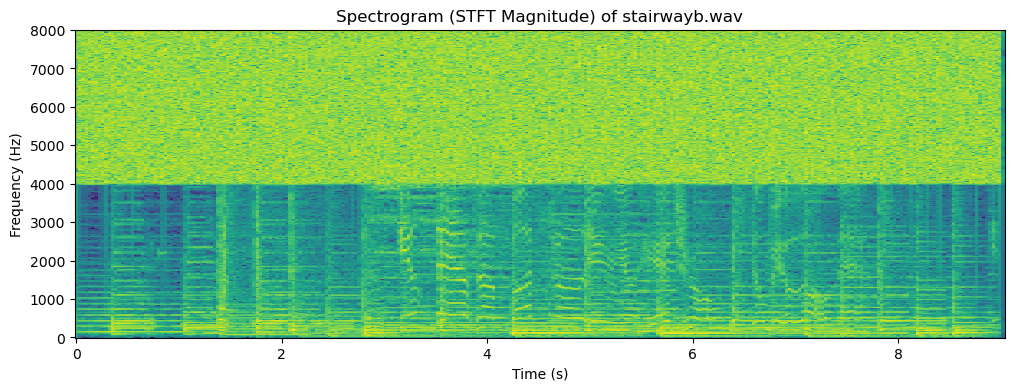

In [12]:
f, t, STFT = sp.signal.stft(x, fs, nperseg=1024, noverlap=(1024/2), window= 'hann')
spectrogram = np.abs(STFT)**2
pl.figure(figsize=(12, 4))
pl.pcolormesh(t, f, spectrogram, norm=LogNorm(vmin=1e-3, vmax=np.max(np.abs(spectrogram))))
pl.title(f'Spectrogram (STFT Magnitude) of {signal}')
pl.ylabel('Frequency (Hz)')
pl.xlabel('Time (s)')
pl.show()

The lower half of the spectrogram is identical to the noiseless signal stairway.wav. The upper half corresponds to gaussian noise as we can see it is uniform in frequencies between 4000 to 8000 exactly as can be seen in the FFT plot.

The spectrogram is interesting because it seperates clearly the signal from the noise. In the temporal signal we can no longer differentiate the drums for instance. However the diracs are still visible in the spectrogram. This highlights the spectrogram's advantage in providing a visual, temporal representation that captures details lost in the amplitude of the temporal signal.

`conso.npz`

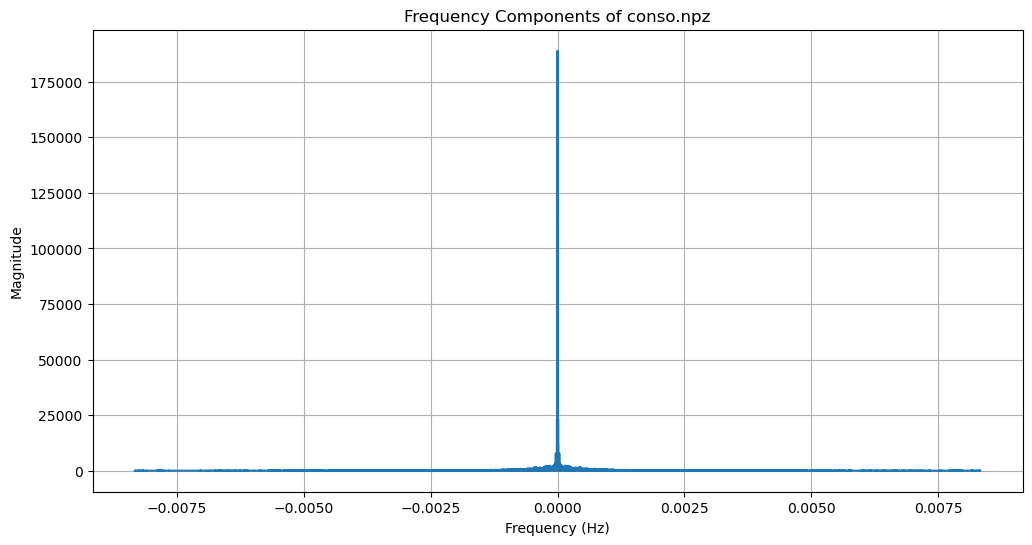

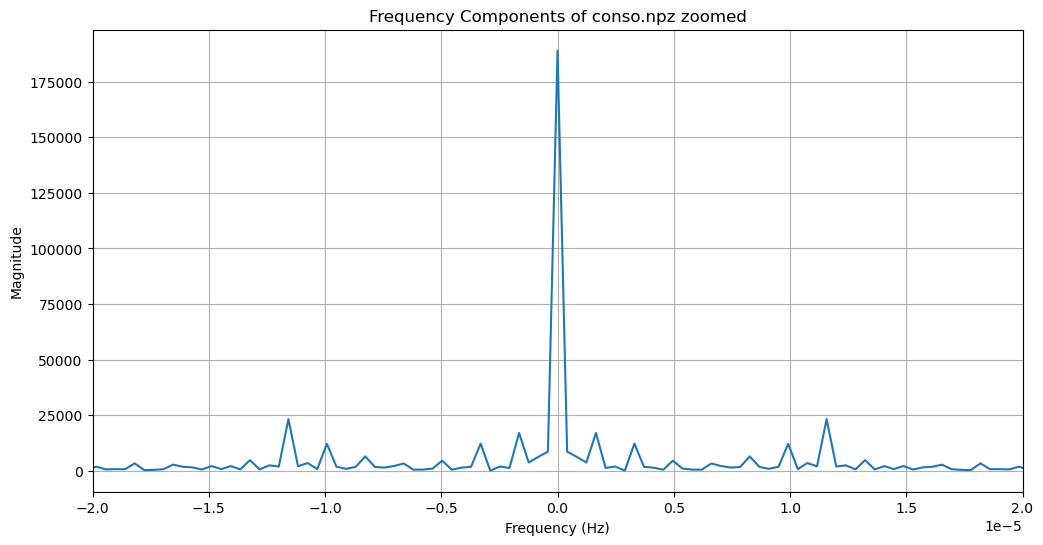

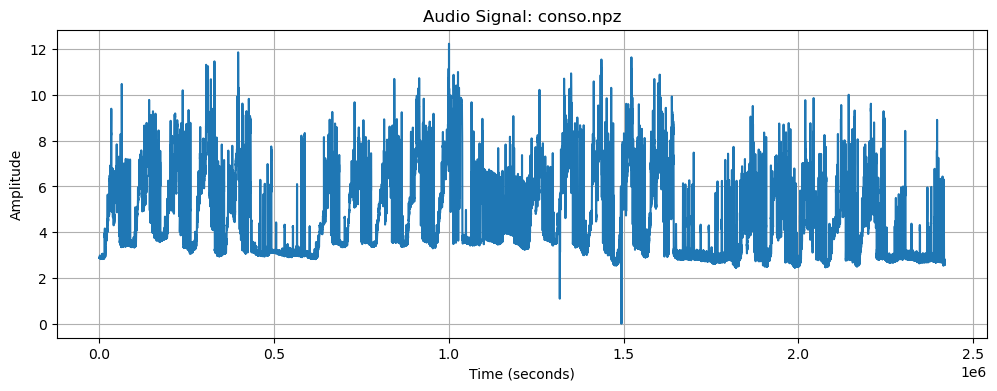

In [13]:
signal = 'conso.npz'
data = np.load(signal)
x = data['x']  
fs = data['fs'] 
plot_fft(fs,x)
#Zoomed in FFT plot
X = np.fft.fft(x)
f = np.fft.fftfreq(len(x), 1/fs)
X_shifted = np.fft.fftshift(X)
f_shifted = np.fft.fftshift(f)
pl.figure(figsize=(12, 6))
pl.plot(f_shifted, np.abs(X_shifted))
pl.title(f'Frequency Components of {signal} zoomed')
pl.xlabel('Frequency (Hz)')
pl.ylabel('Magnitude')
pl.xlim(-0.00002,0.00002)
pl.grid()
pl.show()


plot_signal(fs,x)


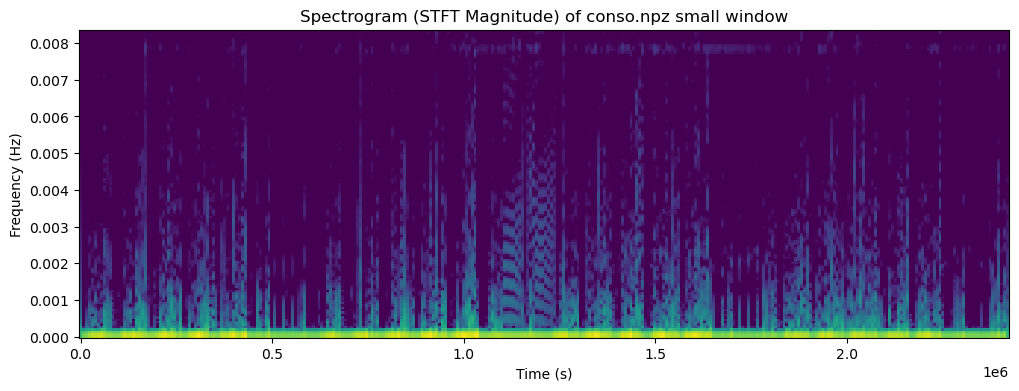

In [14]:
f, t, STFT = sp.signal.stft(x, fs, nperseg=256, noverlap=(256/2), window= 'flattop')
spectrogram = np.abs(STFT)**2
pl.figure(figsize=(12, 4))
pl.pcolormesh(t, f, spectrogram, norm=LogNorm(vmin=1e-3, vmax=np.max(np.abs(spectrogram))))
pl.title(f'Spectrogram (STFT Magnitude) of {signal} small window')
pl.ylabel('Frequency (Hz)')
pl.xlabel('Time (s)')
pl.show()

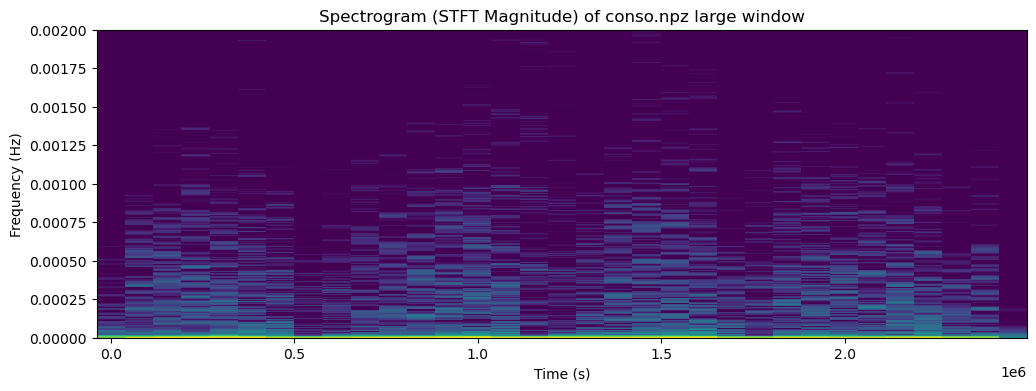

In [15]:
f, t, STFT = sp.signal.stft(x, fs, nperseg=2560, noverlap=(2560/2), window= 'hann')
spectrogram = np.abs(STFT)**2
pl.figure(figsize=(12, 4))
pl.pcolormesh(t, f, spectrogram, norm=LogNorm(vmin=1e-3, vmax=np.max(np.abs(spectrogram))))
pl.title(f'Spectrogram (STFT Magnitude) of {signal} large window')
pl.ylabel('Frequency (Hz)')
pl.ylim(0,0.002)
pl.xlabel('Time (s)')
pl.show()

The frequencies present in the signal are concentrated in the low-frequency range, with the highest magnitude corresponding to the DC component at 0 Hz.

We need good temporal resolution to see the daily electricity consumption pattern. The spectrogram shows this periodicity clearer than the temporal signal. With a small window nperseg=256,  the temporal resolution is high, making it easy to distinguish daily activity clusters. If we increase nperseg (2048), we lose time resolution but we can still see the weekly periodicity (4 weeks = 4clusters of non null frequencies separated by weekends) And the frequency resolution is higher. 

 Using LogNorm is essential, as it compresses the dynamic range and makes the small but important frequency components more visible.

Since the FT plot shows frequencies concentrated around 0, minimizing side lobes is crucial, and having a large central lobe is acceptable. The flattop window is well-suited for this, as it provides accurate frequency estimates, reduces spectral leakage from the strong DC component, and highlights smaller frequencies. A rectangular window, on the other hand, merges the daily consumption pattern, making it harder to see separate clusters. The Hann window strikes a good balance, enhancing frequency resolution without significant trade-offs, although it doesn't show frequency magnitudes as well as as flattop does.

The flattop window makes noise more visible than other windows because it gives precise magnitude estimation for all frequencies. However, this is manageable, as the focus is on the dominant periodic components.

Depending on the window, we can recover the daily period (approximately 1/24 hours, or 0.0416 Hz). The weekly periodicity can similarly be related to a frequency of approximately 1/168 hours (0.00595 Hz)

`205.npz`

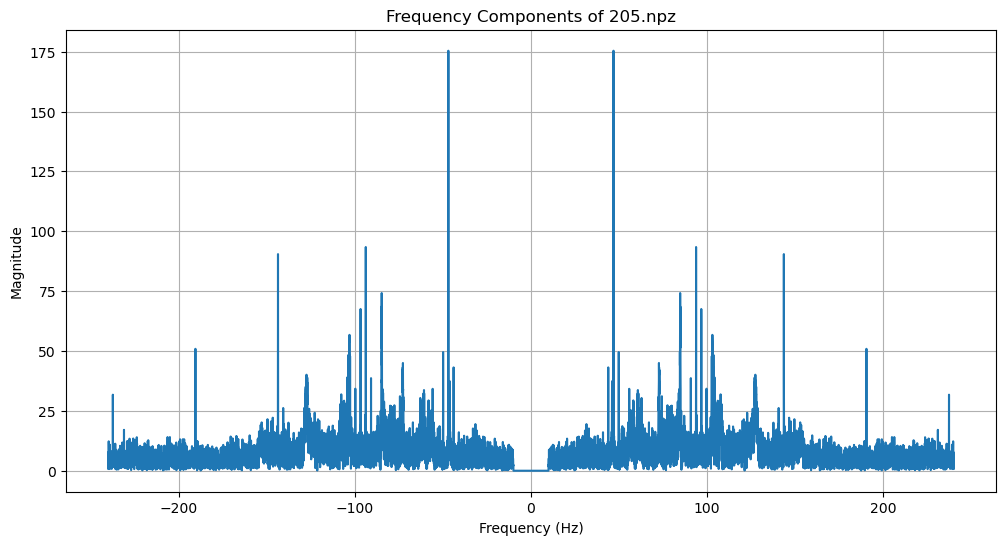

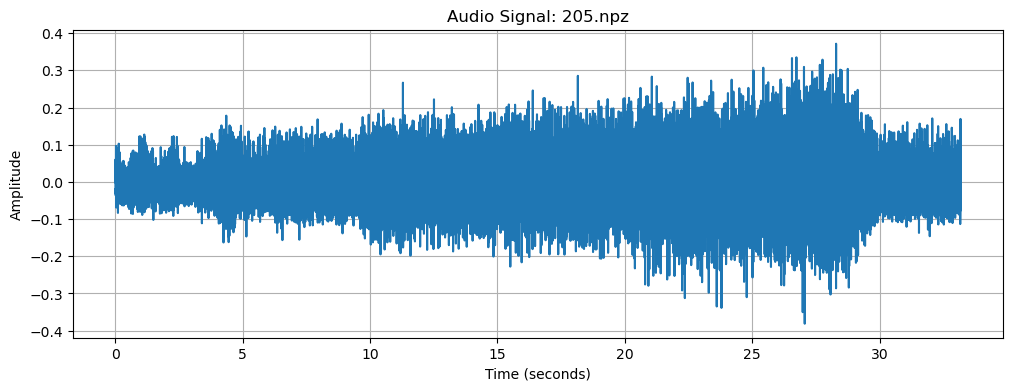

In [16]:
signal = '205.npz'
data = np.load(signal)
x = data['x']  
fs = data['fs'] 
plot_fft(fs,x)
plot_signal(fs,x)


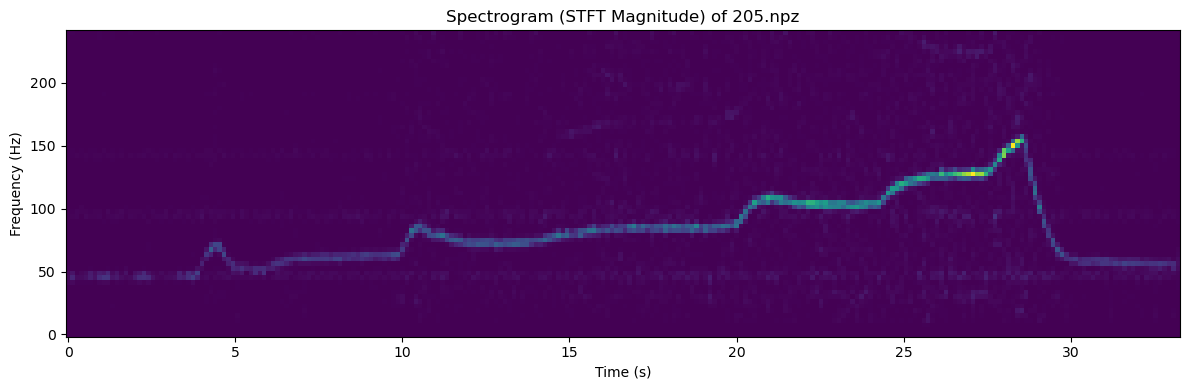

In [17]:
f, t, STFT = sp.signal.stft(x, fs, nperseg=128, noverlap=(128/2), window= 'hann')
spectrogram = np.abs(STFT)**2
pl.figure(figsize=(12, 4))
pl.pcolormesh(t, f, spectrogram, norm=None)#LogNorm(vmin=1e-3, vmax=np.max(np.abs(spectrogram))))
pl.title(f'Spectrogram (STFT Magnitude) of {signal}')
pl.ylabel('Frequency (Hz)')
pl.xlabel('Time (s)')
pl.tight_layout()
pl.show()

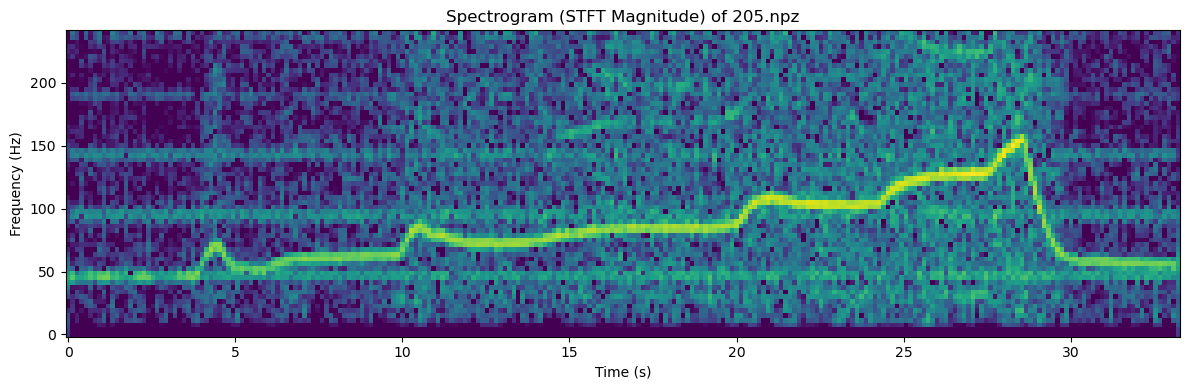

In [18]:
spectrogram = np.abs(STFT) #absolute value
pl.figure(figsize=(12, 4))
pl.pcolormesh(t, f, spectrogram, norm=LogNorm(vmin=1e-3, vmax=np.max(np.abs(spectrogram))))
pl.title(f'Spectrogram (STFT Magnitude) of {signal}')
pl.ylabel('Frequency (Hz)')
pl.xlabel('Time (s)')
pl.tight_layout()
pl.show()

The FFT plot shows a fundamental frequency around 50 Hz with equidistant harmonics. When using the squared STFT, the harmonics are barely visible because squaring amplifies other noise. By plotting the absolute value of the STFT, the harmonics become more visible. Applying Log scaling to the absolute value further enhances the visibility of the harmonics by compressing the dynamic range, making the lower amplitude components more distinguishable.


When using Norm=None, we can see the spectrogram more clearly with the squared STFT. nperseg should be low because even though frequency resolution is important but not at the cost of time resolution because we want to follow frequency evolution through time, so we fix nperseg=128.

We observe parallel horizontal lines that are likely harmonics of the engine’s fundamental frequency which is 50Hz. The evolution of the frequency over time corresponds to changes in the engine's speed as the throttle is adjusted. Noise increases in magnitude as the frequency rises, especially when higher RPMs are reached. if we admit 750RPM corresponds to the observable 50Hz frequency, then the maximum RPM reached is about 2250RPM at 150 Hz.

##### 1.2 Denoising with STFT

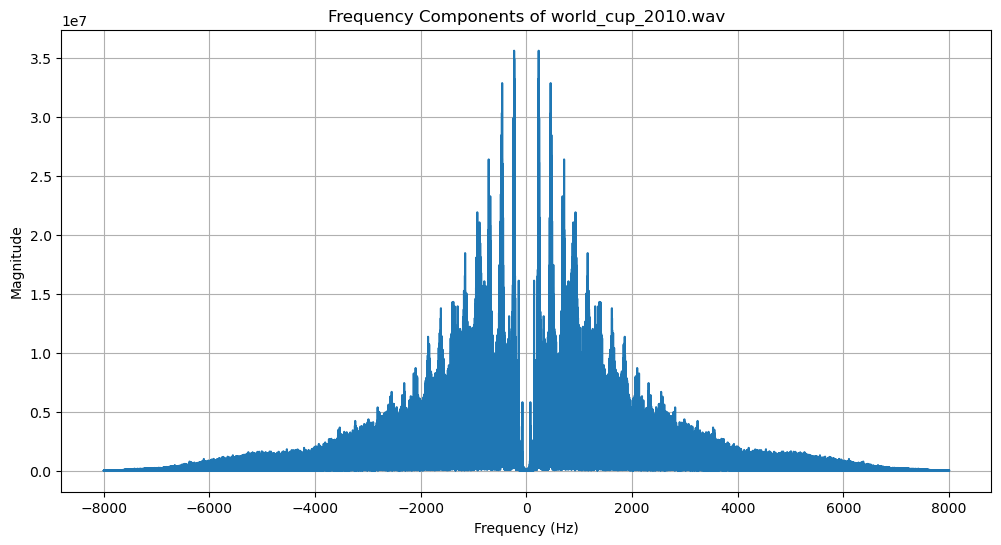

In [19]:
#1-
signal = 'world_cup_2010.wav'
fs, x= sp.io.wavfile.read(signal)
#sounddevice.play(x, fs)
#sounddevice.wait() 
plot_fft(fs,x)

Yes, the vuvuzela sound can be heard throughout the audio in the background.

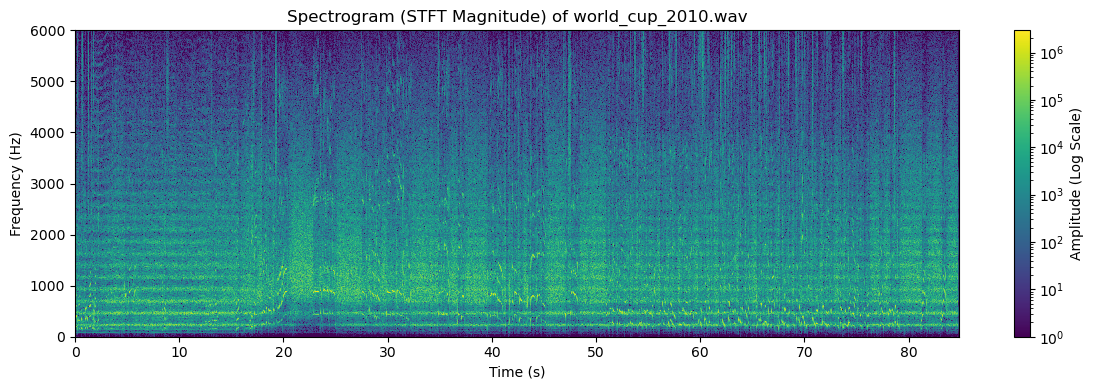

In [20]:
#2-
f, t, STFT = sp.signal.stft(x, fs, nperseg=2048, noverlap=(2048/2), window= 'hann')
spectrogram = np.abs(STFT)**2
pl.figure(figsize=(12, 4))
pl.pcolormesh(t, f, spectrogram, norm=LogNorm(vmin=1e-0, vmax=np.max(np.abs(spectrogram))))
pl.title(f'Spectrogram (STFT Magnitude) of {signal}')
pl.ylabel('Frequency (Hz)')
pl.xlabel('Time (s)')
pl.colorbar(label='Amplitude (Log Scale)')
pl.ylim(0,6000) #Plot only for frequencies with high magnitude
pl.tight_layout()
pl.show()

The vuvuzela is represented by constant parallel frequencies in the spectrogram, while the commentator's voice shows fluctuations in frequency, which is typical of human speech. Around the 20-second mark, we observe these fluctuations begin, corresponding to the commentator's scream after the goal, lasting until approximately the 40-second mark. Overall, the parallel horizontal harmonics correspond to the vuvuzela whereas the fundamentals that vary over time are the voice.

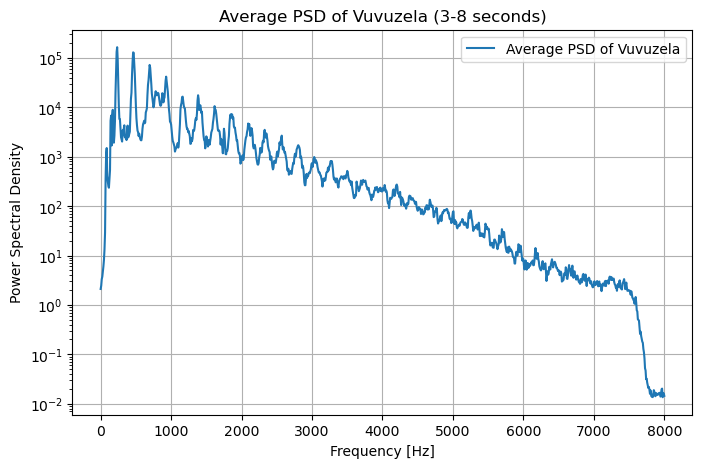

In [21]:
#3-
# Extract the time indices corresponding to 3-8 seconds
time_indices = (t >= 3) & (t <= 8)

# Average PSD over the selected time range
vuvuzela_psd = np.mean(spectrogram[:, time_indices], axis=1)

# Plot the PSD
pl.figure(figsize=(8, 5))
pl.semilogy(f, vuvuzela_psd, label='Average PSD of Vuvuzela')
pl.title('Average PSD of Vuvuzela (3-8 seconds)')
pl.xlabel('Frequency [Hz]')
pl.ylabel('Power Spectral Density')
pl.legend()
pl.grid()
pl.show()


In [22]:
#4-

phase = np.angle(STFT)
magnitude = np.abs(STFT)
lambda_threshold = np.tile(np.sqrt(vuvuzela_psd)[:, np.newaxis], (1, magnitude.shape[1]))
magnitude_thresholded = np.maximum(0, magnitude - lambda_threshold)

Xw_denoised = magnitude_thresholded * np.exp(1j * phase)
_, x_denoised = sp.signal.istft(Xw_denoised, fs, nperseg=2048, noverlap=2048/2, window='hann')

sp.io.wavfile.write("worldcup_denoised.wav", fs, x_denoised.astype(np.int16))


#5-

By thresholding the noise using its PSD, we can then reconstruct the signal by multiplying the stft with its phase and then applying inverse stft. This method is called spectral subtraction because it allows to remove background noise without touching the interesting frequencies. Unlike a pass band for example that cuts all frequencies above a frequency threshold, here using a magnitude/psd threshold allows to substract the noise without cutting the main signal with it.

The result is a file with almost no vuvuzela sound, but there are audio artifacts, type of bubble noise or robotic machine-like sounds.

Effects of window size:
- With a window size of 256, there are noticeable bubble/wave sounds, and the commentator's voice sounds like it's underwater.
- With a window size of 1024, the result is pretty good and we can hear the commentator clearly, but still includes some artifacts in the background.
- With a window size of 2048, the sound is smoother with background noise that sounds somewhat robotic, similar to that used in old sci-fi movies, with no bubble noises.

Increasing the window size improves frequency resolution, which in turn allows for better noise subtraction. And it is necessary to preserve the same nperseg value for both stft and istft .

#### 2 Audio unmixing with Non-negative Matrix factorization

In [23]:
#1-
signal = 'uku_chords.wav'
fs, x= sp.io.wavfile.read(signal)
#sounddevice.play(x, fs)
#sounddevice.wait() 

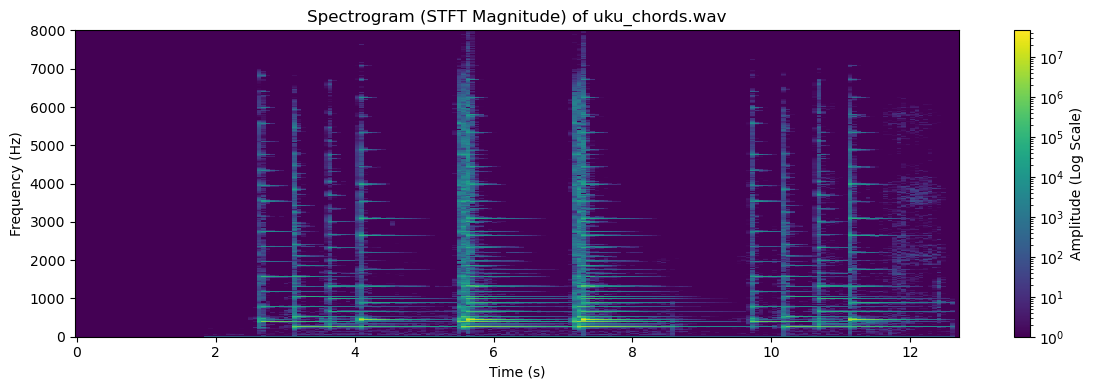

In [24]:
#2-
f, t, STFT = sp.signal.stft(x, fs, nperseg=2048, noverlap=(1024), window= 'hann')
spectrogram = np.abs(STFT)**2
spectrogram_x,t_x=spectrogram,t
pl.figure(figsize=(12, 4))
pl.pcolormesh(t, f, spectrogram, norm=LogNorm(vmin=1e-0, vmax=np.max(np.abs(spectrogram))))
pl.title(f'Spectrogram (STFT Magnitude) of {signal}')
pl.ylabel('Frequency (Hz)')
pl.xlabel('Time (s)')
pl.colorbar(label='Amplitude (Log Scale)')
pl.tight_layout()
pl.show()

Each note is represented by a vertical line in the spectrogram, with horizontal lines indicating its harmonics. Single notes are closely spaced, while chords appear more uniform in frequency and slightly more spread out in time. Chords have more harmonics corresponding to the different notes within them, giving them a richer and more complex structure.



In [25]:
#3-
from sklearn.decomposition import NMF

p=4
nmf=NMF(n_components=p)
nmf.fit(spectrogram)
A=nmf.fit_transform(spectrogram.T).T
D = nmf.components_.T


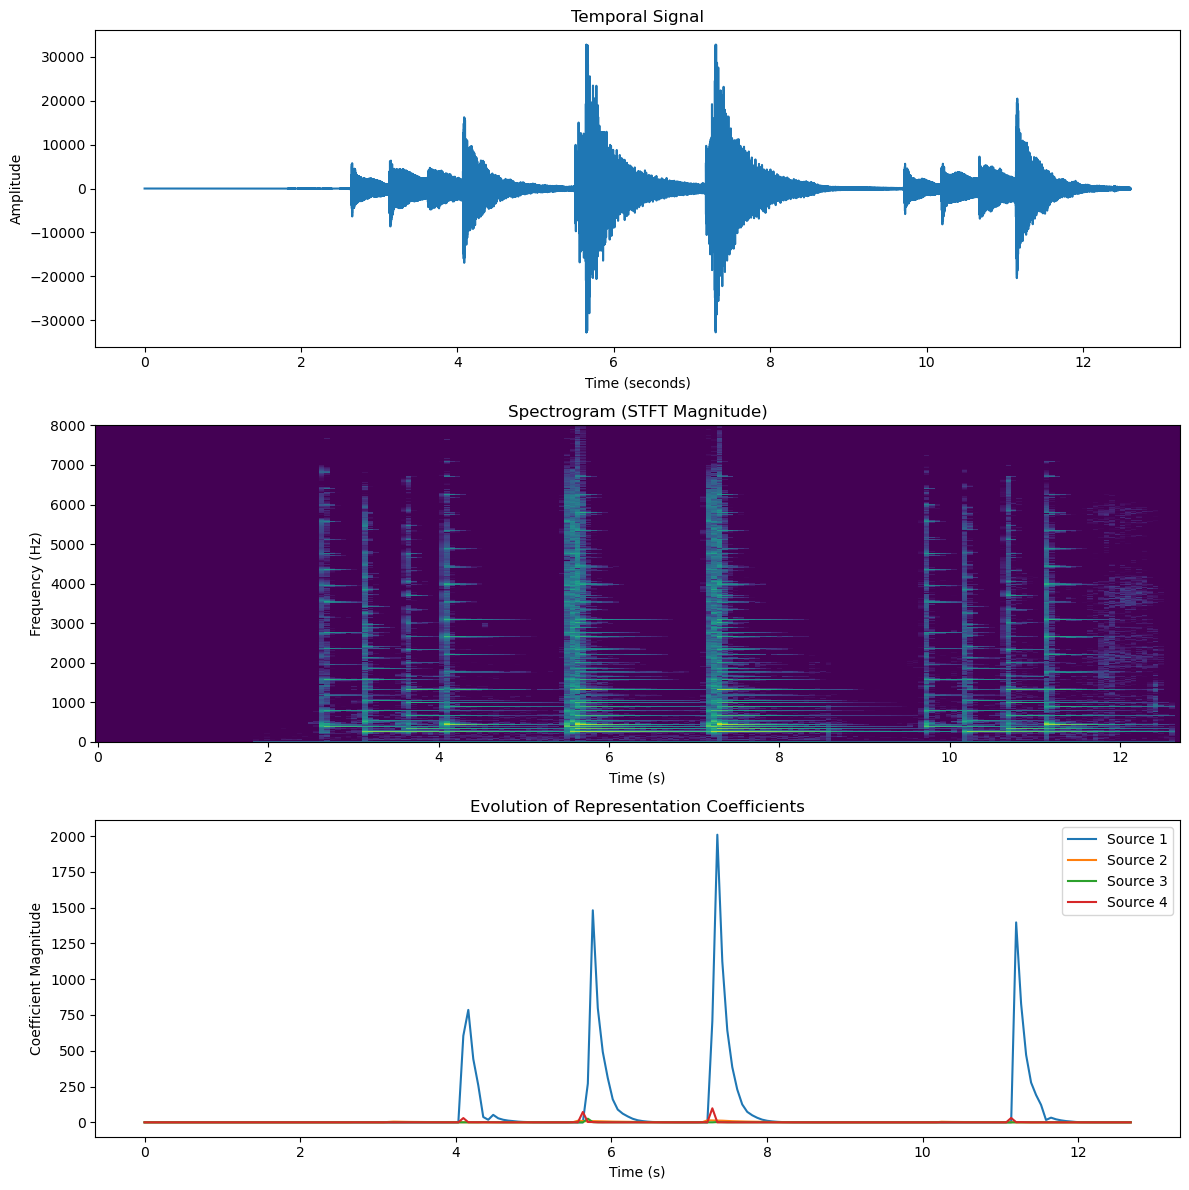

In [26]:
#4- 
pl.figure(figsize=(12, 12))

#Temporal Signal 
pl.subplot(3, 1, 1)
pl.plot(np.arange(0, len(x)) / fs, x)  
pl.title('Temporal Signal')
pl.xlabel('Time (seconds)')
pl.ylabel('Amplitude')

#Spectrogram 
pl.subplot(3, 1, 2)
pl.pcolormesh(t, f, spectrogram, norm=LogNorm(vmin=1e-0, vmax=np.max(np.abs(spectrogram))))
pl.title('Spectrogram (STFT Magnitude)')
pl.ylabel('Frequency (Hz)')
pl.xlabel('Time (s)')

# Evolution of Representation Coefficients A
pl.subplot(3, 1, 3)
for i in range(p):
    pl.plot(t, A[i, :], label=f'Source {i+1}')
pl.title('Evolution of Representation Coefficients')
pl.xlabel('Time (s)')
pl.ylabel('Coefficient Magnitude')
pl.legend()

pl.tight_layout()
pl.show()

The evolution of the representation coefficients shows how much each source contributes to the signal over time. The sources seem to overlap, indicating that they correspond to different parts of the same note or even multiple notes in a chord. Source 1, with the highest peaks, likely represents the main note, while the other sources, with lower and more sporadic peaks, seem to represent harmonics or background components. Source 3 (green) only contributes to one peak (the first chord, meaning that it is likely an individual note that only appears in the first chord. 

The overlapping contributions of source 1 and 4 for example suggest that the sources are not completely independent and might be blending elements of the same notes.



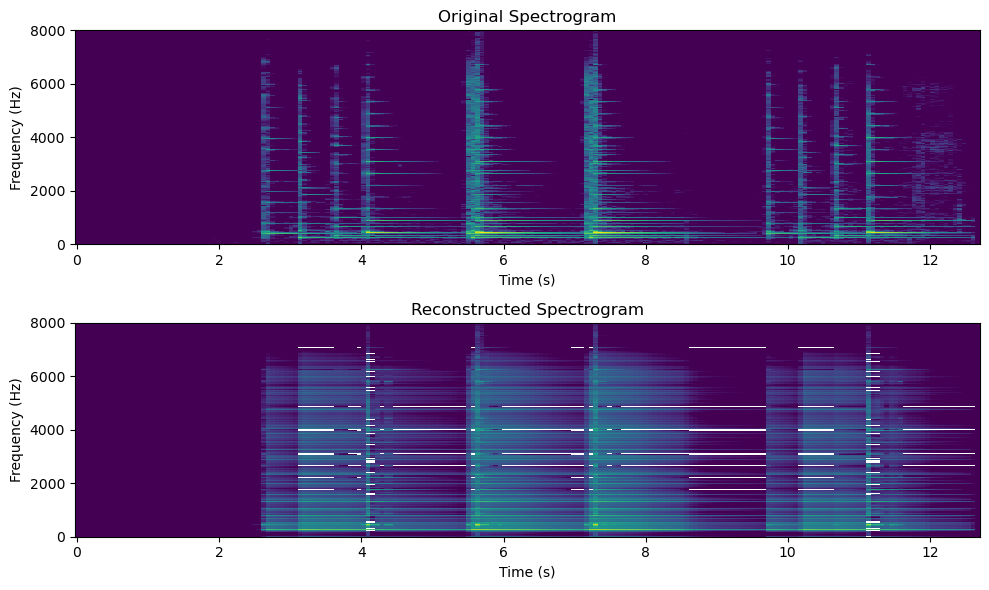

In [27]:
#5-

S_hat = np.dot(D, A)

pl.figure(figsize=(10, 6))

pl.subplot(2, 1, 1)
pl.pcolormesh(t, f, spectrogram, norm=LogNorm(vmin=1e-0, vmax=np.max(np.abs(spectrogram))))
pl.title('Original Spectrogram')
pl.ylabel('Frequency (Hz)')
pl.xlabel('Time (s)')

pl.subplot(2, 1, 2)
pl.pcolormesh(t, f, S_hat, norm=LogNorm(vmin=1e-0, vmax=np.max(np.abs(spectrogram))))
pl.title('Reconstructed Spectrogram')
pl.ylabel('Frequency (Hz)')
pl.xlabel('Time (s)')

pl.tight_layout()
pl.show()


Comparison: 

The overall shape of the spectrogram is maintained. The individual notes and chords are still visible in the reconstructed spectrogram, but the reconstruction has a lower resolution and is more "smeared" and spread out in time. There are also white artifacts likely due to the low rank approximation. The NMF model did capture the main components of the soectrogram, but the reconstruction is not as sharp as the original.

In [28]:
#6-

magnitude = np.abs(STFT)
phase = np.angle(STFT)

sources = []
for k in range(p):
    dk = D[:, k]  # Column
    ak = A[k, :]  # Row
    S_k_magnitude = np.outer(dk, ak) 

    S_k = S_k_magnitude * np.exp(1j * phase)
    
    _, x_k = sp.signal.istft(S_k, fs, nperseg=2048, noverlap=1024, window='hann')
    sources.append(x_k)

    x_k=x_k/np.max(np.abs(x_k))
    sp.io.wavfile.write(f'source_{k+1}.wav', fs, x_k.astype(np.float32))



The different sources represent distinct components or layers of the sound. For example, Source 2 captures the mechanical vibrations of the ukulele strings, producing a sound that is stretched in time and has a characteristic mechanical quality. In contrast, Source 1 has a short echo, creating a brief, percussive sound. Sources 3 and 4 correspond to shorter notes representing individual plucks or hits. We can visualize the frquency components of each source:

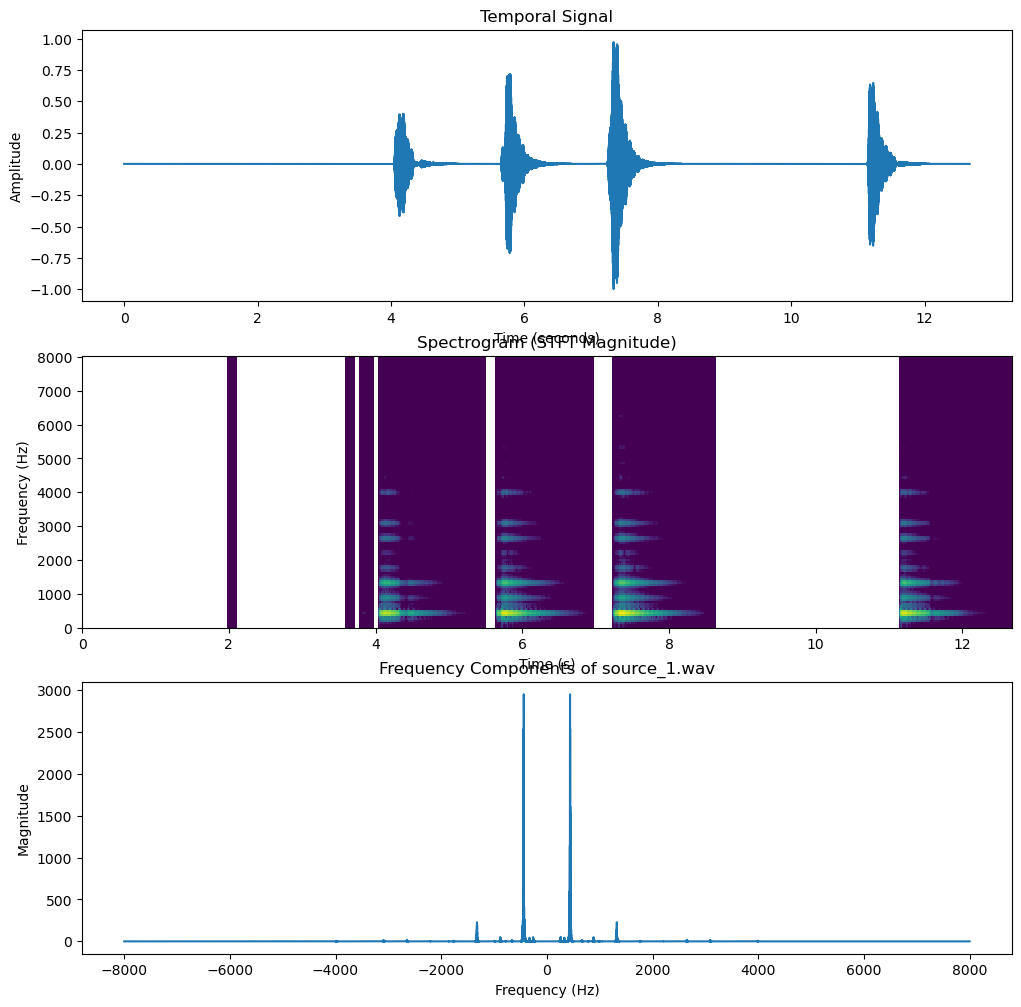

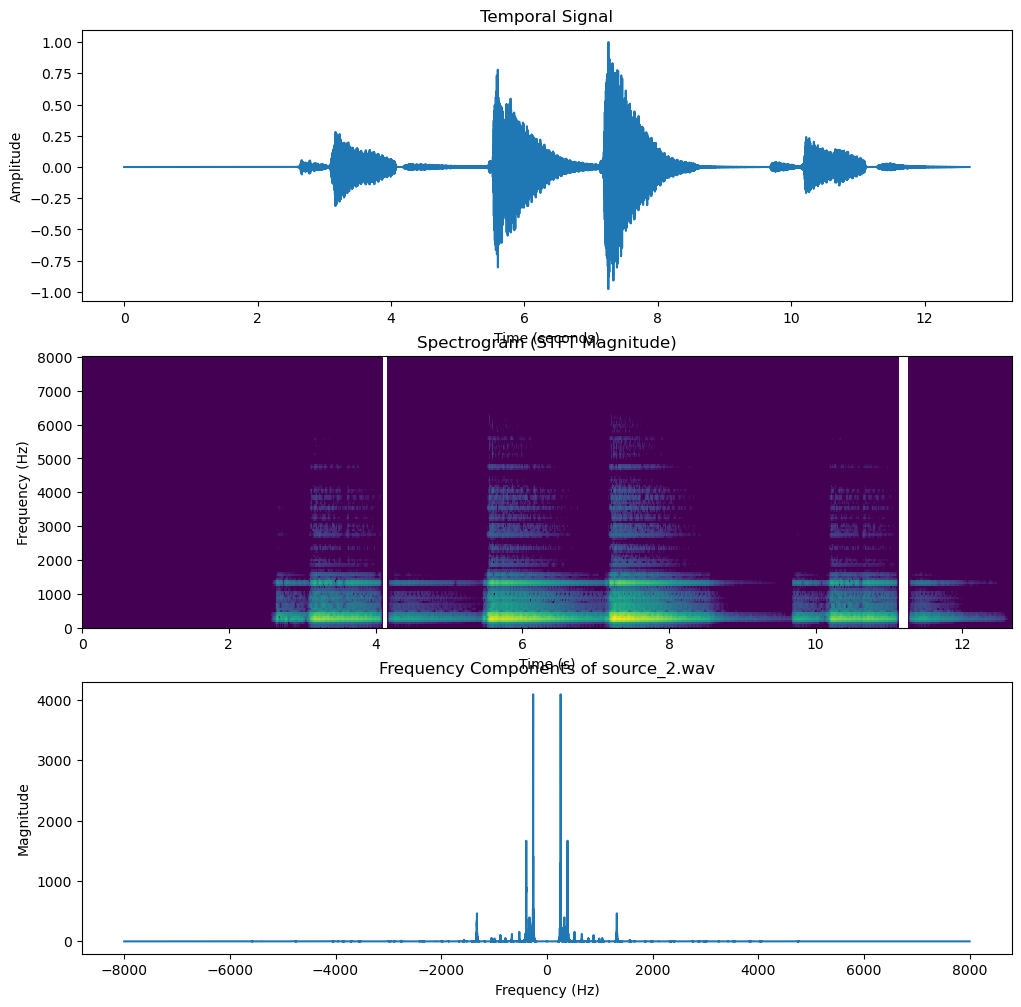

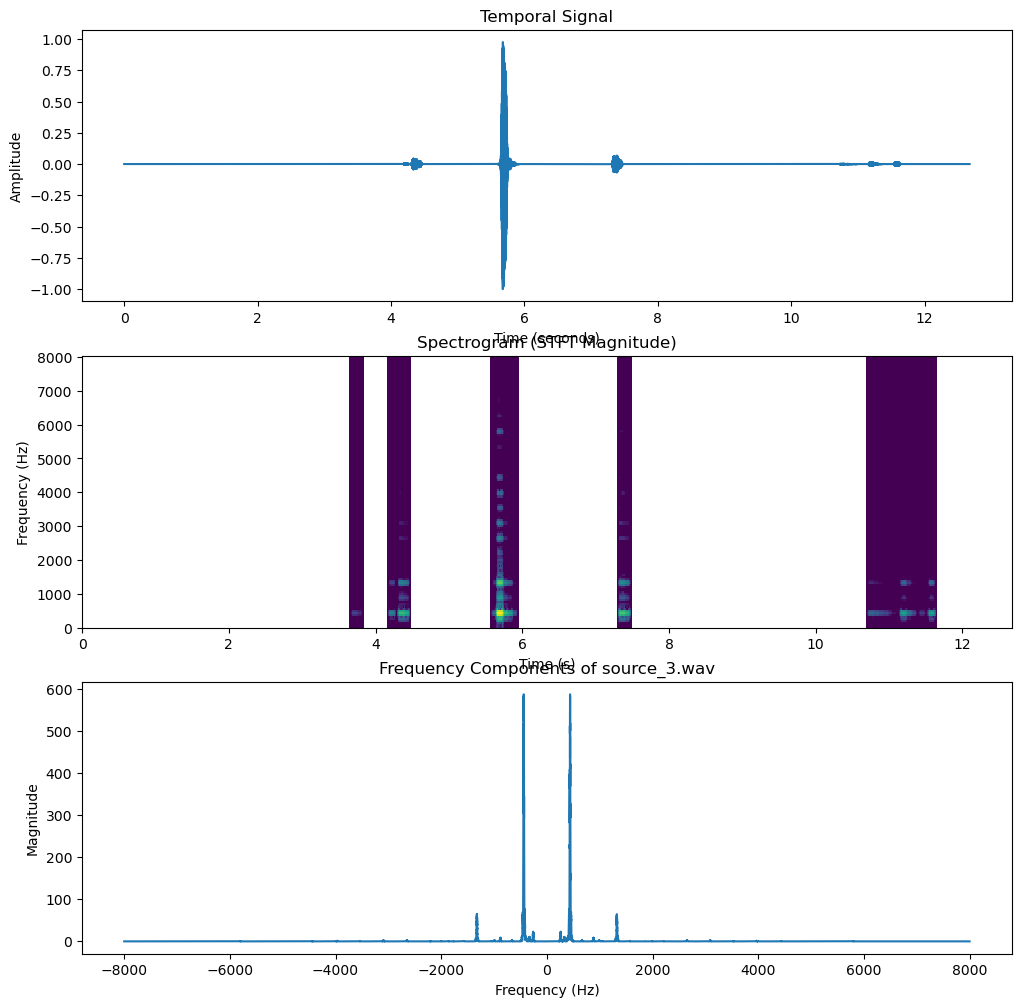

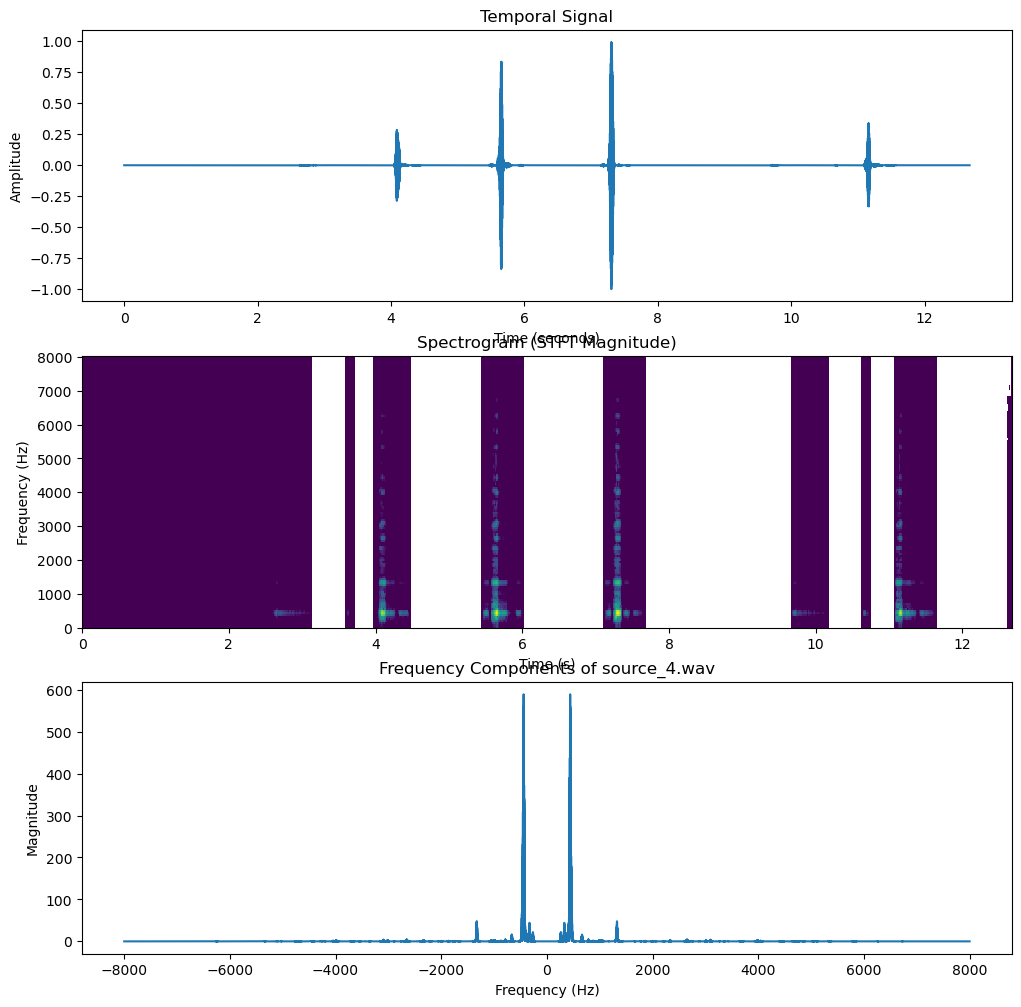

In [29]:
for i in range(p):
    fs, x= sp.io.wavfile.read(f'source_{i+1}.wav')
    f, t, STFT = sp.signal.stft(x, fs, window= 'hann')
    spectrogram = np.abs(STFT)**2
    pl.figure(figsize=(12, 12))
    pl.subplot(3, 1, 1)
    pl.plot(np.arange(0, len(x)) / fs, x) 
    pl.title('Temporal Signal')
    pl.xlabel('Time (seconds)')
    pl.ylabel('Amplitude')
    pl.subplot(3, 1, 2)
    pl.pcolormesh(t, f, spectrogram, norm=LogNorm(vmin=1e-9, vmax=np.max(np.abs(spectrogram))))
    pl.title('Spectrogram (STFT Magnitude)')
    pl.ylim(0,)
    pl.ylabel('Frequency (Hz)')
    pl.xlabel('Time (s)')
    pl.subplot(3, 1, 3)
    X = np.fft.fft(x)
    f = np.fft.fftfreq(len(x), 1/fs)
    pl.plot(np.fft.fftshift(f), np.abs(np.fft.fftshift(X)))
    pl.title(f'Frequency Components of source_{i+1}.wav')
    pl.xlabel('Frequency (Hz)')
    pl.ylabel('Magnitude')
    pl.show()

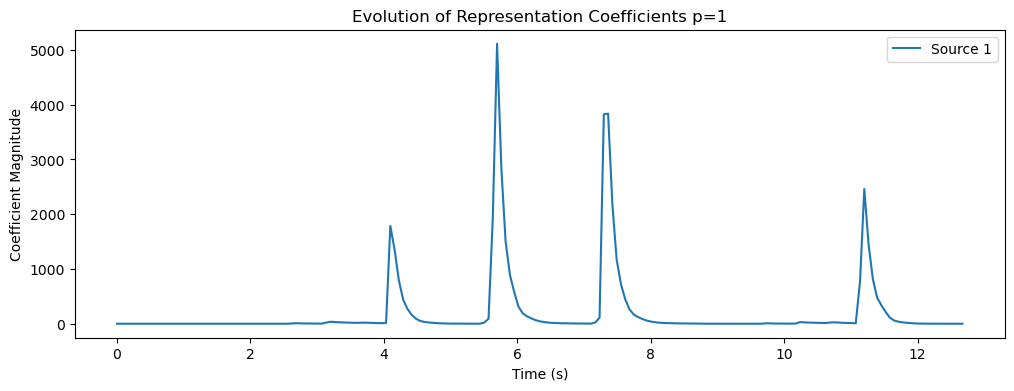

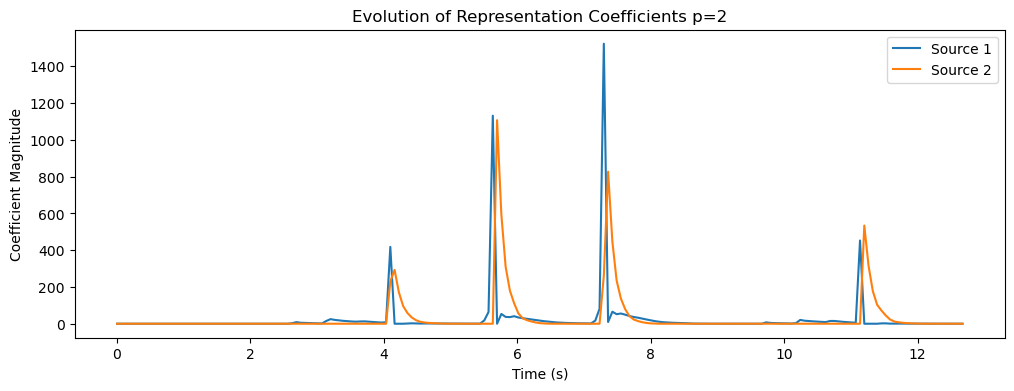

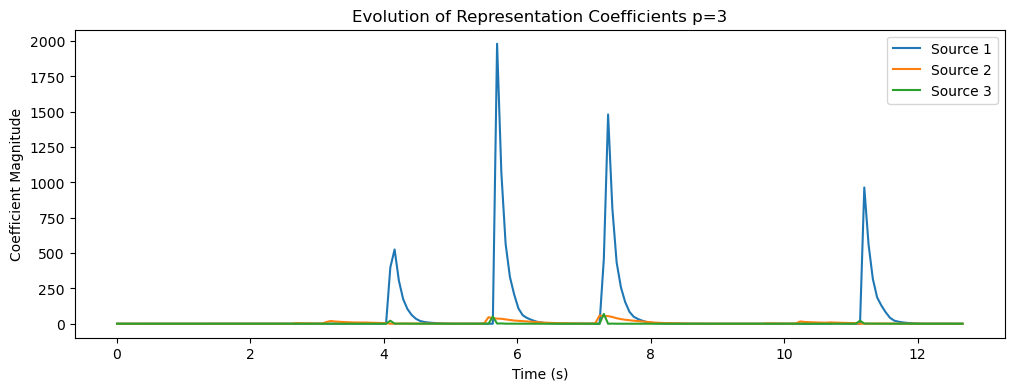

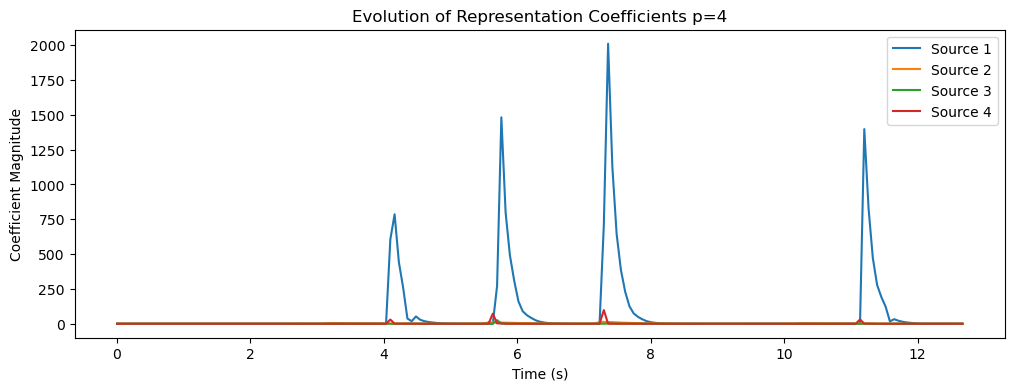

In [30]:
#7- Different p values

for p in range(1,5):
    pl.figure(figsize=(12, 4))
    nmf=NMF(n_components=p)
    nmf.fit(spectrogram_x)
    A=nmf.fit_transform(spectrogram_x.T).T
    for i in range(p):
        pl.plot(t_x, A[i, :], label=f'Source {i+1}')
    pl.title(f'Evolution of Representation Coefficients p={p}')
    pl.xlabel('Time (s)')
    pl.ylabel('Coefficient Magnitude')
    pl.legend()
    pl.show()

#7- Different p values

p=2 exactly two sources with similar coefficient magnitudes, one corresponds to the note (vertical) and the other is harmonics (parallel horizontal lines)

As we increase p, the decomposition becomes more granular and the sources are more seperated. One dominant source has the highest magnitude (the main notes), then the other sources have lower magnitudes.

Increasing p introduces redundancy, potentially representing a single source across multiple components. This could lead to instability or artifacts in reconstruction. In some cases, it can lead to overfitting by capturing minor details, and risks amplifying noise or irrelevant features. On the other hand having a low p can merge multiple sources into one reducing clarity in distinguishing between them.

A single note can often correspond to a single source if the note's harmonics, pitch, and timbre are isolated without overlap from other sources in the audio signal. however that is not always the case as the fundamental and harmonics can be distributed across different sources.

Reconstruction of individual sources can be done in for the STFT by keeping the phase and scaling according to the sources proportions like in spectral substraction. This approach helps preserve the integrity of the note by combining its components that were split during decomposition. And sometimes when decomposing a signal into different sources, we can choose the pertinent sources and disregard noise to better reconstruct the note we want.

In [31]:
#8- Source separation on `drum.wav`

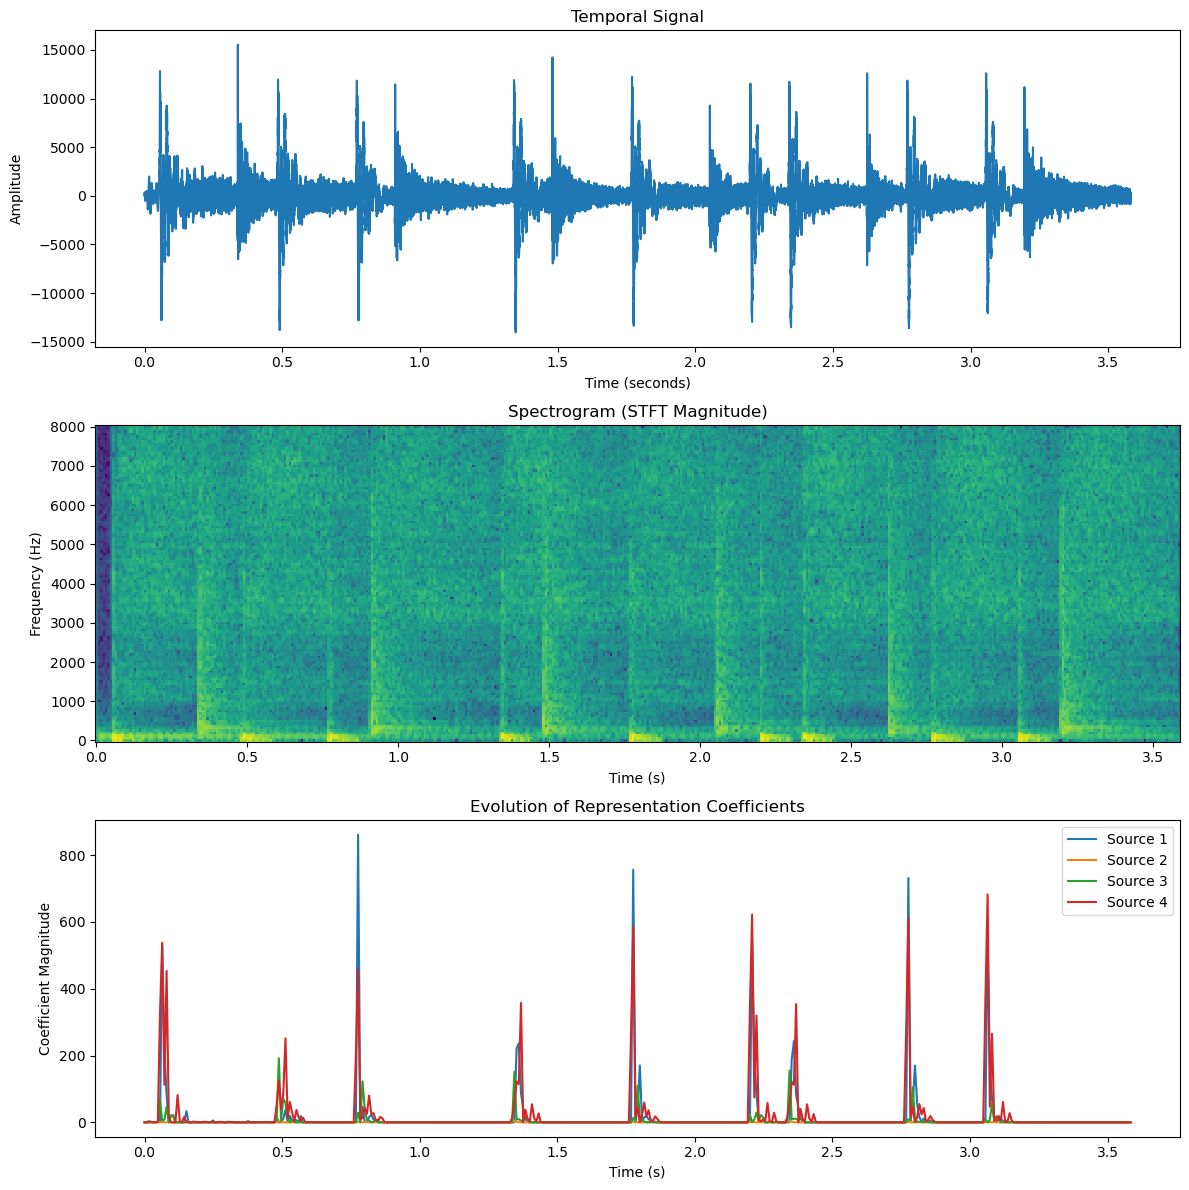

In [32]:
signal = 'drum.wav'
fs, x= sp.io.wavfile.read(signal)

f, t, STFT = sp.signal.stft(x, fs, nperseg=256, noverlap=(256/2), window= 'hann')
spectrogram = np.abs(STFT)**2

p=4
nmf=NMF(n_components=p)
nmf.fit(spectrogram)
A=nmf.fit_transform(spectrogram.T).T
D = nmf.components_.T

pl.figure(figsize=(12, 12))

pl.subplot(3, 1, 1)
pl.plot(np.arange(0, len(x)) / fs, x)  
pl.title('Temporal Signal')
pl.xlabel('Time (seconds)')
pl.ylabel('Amplitude')

pl.subplot(3, 1, 2)
pl.pcolormesh(t, f, spectrogram, norm=LogNorm(vmin=1e-3, vmax=np.max(np.abs(spectrogram))))
pl.title('Spectrogram (STFT Magnitude)')
pl.ylabel('Frequency (Hz)')
pl.xlabel('Time (s)')

pl.subplot(3, 1, 3)
for i in range(p):
    pl.plot(t, A[i, :], label=f'Source {i+1}')
pl.title('Evolution of Representation Coefficients')
pl.xlabel('Time (s)')
pl.ylabel('Coefficient Magnitude')
pl.legend()

pl.tight_layout()
pl.show()

For p=2, source 1 one presents peaks that coincide with drum peaks in the spectrogram. Source 2 is a flat line with magnitude 0. this shows that the NMF considered the drums as the main and only source in the signal.

For p=4, the sources have different magnitudes but they overlap, indicating that they are all related to drum beats and are different components of it. Source 1 has the highest magnitude and is very localised, probably corresponding to diracs of drums, source 4 however has oscillations that extend beyong the dirac, it can be due to the echo or reverb.

### Discussion
